#### Carregando as importações

In [1]:
import import_ipynb
from imports.imports_common import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb


In [14]:
train_data = image_dataset_from_directory(
    path,
    label_mode = 'categorical',
    validation_split = VAL_SPLIT,
    subset = "training",
    seed = SEED,
    color_mode = COLOR_MODE,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.


In [15]:
validation_data = image_dataset_from_directory(
    path,
    validation_split = VAL_SPLIT,
    subset = "validation",
    label_mode = 'categorical',
    seed = SEED,
    color_mode = COLOR_MODE,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [16]:
test_data = image_dataset_from_directory(
    path,
    validation_split = VAL_SPLIT,
    subset = "validation",
    label_mode = 'categorical',
    seed = SEED,
    color_mode = COLOR_MODE,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.



Quatro classes, são elas: demente muito leve (VMD, do inglês Very Mild Dementia), demente leve (MID, do inglês), demente moderado (MOD, do inglês Moderate Dementia) não demente (ND, do inglês Non-Demented)

In [17]:
class_names = train_data.class_names
num_classes = len(class_names)

print(f'{num_classes} classes: {class_names}')

4 classes: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [6]:
#Create the model
cnn = Sequential()
#initially 64 convolution nodes
cnn.add(Conv2D(64, (3,3), padding = "same", activation = 'relu'))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 32 convolution nodes
cnn.add(Conv2D(32,(3,3),padding="same", activation = 'relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 32 convolutions
cnn.add(Conv2D(32, (2,2), padding="same", activation = 'relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 100 nodes
cnn.add(Dense(100, activation = 'relu'))
#Add another hidden layer with 50 nodes
cnn.add(Dense(50, activation = 'relu'))
#Add final output layer with 4 output nodes using softmax
cnn.add(Dense(4, activation = 'softmax'))

In [7]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [8]:
#Train the Convolutional Neural Network on the data
history = cnn.fit(train_data, epochs = 25, validation_data = validation_data,  callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 64s 390ms/step - loss: 1.6820 - accuracy: 0.5287 - val_loss: 0.9179 - val_accuracy: 0.5859
Epoch 2/25
160/160 [==============================] - 69s 428ms/step - loss: 0.8385 - accuracy: 0.6135 - val_loss: 0.7745 - val_accuracy: 0.6672
Epoch 3/25
160/160 [==============================] - 70s 439ms/step - loss: 0.6921 - accuracy: 0.6973 - val_loss: 0.8159 - val_accuracy: 0.6484
Epoch 4/25
160/160 [==============================] - 62s 385ms/step - loss: 0.5915 - accuracy: 0.7457 - val_loss: 0.6509 - val_accuracy: 0.7172
Epoch 5/25
160/160 [==============================] - 63s 393ms/step - loss: 0.4547 - accuracy: 0.8057 - val_loss: 0.4996 - val_accuracy: 0.7945
Epoch 6/25
160/160 [==============================] - 68s 422ms/step - loss: 0.3372 - accuracy: 0.8666 - val_loss: 0.5395 - val_accuracy: 0.7914
Epoch 7/25
160/160 [==============================] - 63s 391ms/step - loss: 0.2456 - accuracy: 0.9004 - val_loss: 0.5172 - val_ac

In [9]:
# Fazer previsões no conjunto de teste
y_pred = cnn.predict(test_data)

y_pred

40/40 [==============================] - 5s 131ms/step


array([[1.5270062e-03, 1.7947031e-14, 9.9759227e-01, 8.8074239e-04],
       [2.6468083e-11, 5.4305574e-18, 1.0000000e+00, 3.4289439e-11],
       [7.2930449e-01, 3.0090201e-11, 1.4577695e-04, 2.7054974e-01],
       ...,
       [1.1930824e-04, 5.3015867e-09, 9.5924675e-01, 4.0633935e-02],
       [2.2153911e-06, 1.8065077e-07, 9.9994934e-01, 4.8270715e-05],
       [1.4526874e-04, 4.5243275e-12, 9.9781978e-01, 2.0349396e-03]],
      dtype=float32)

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

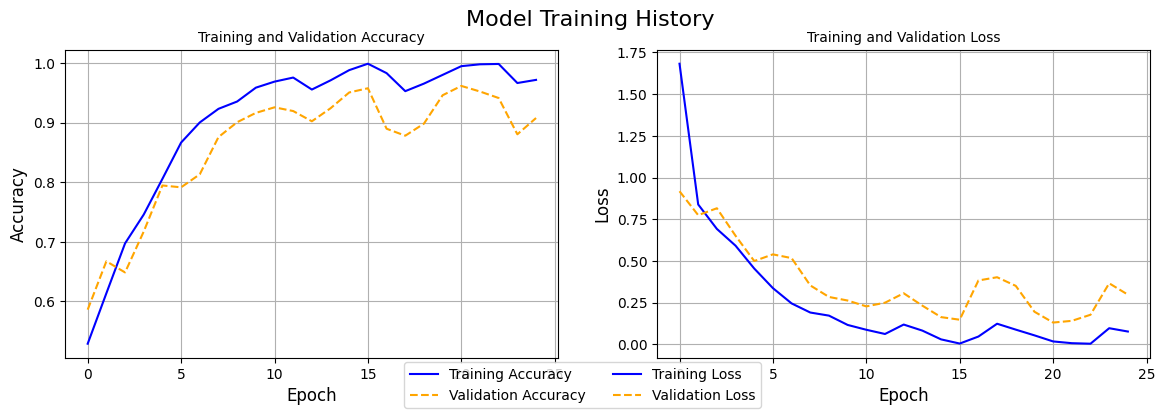

In [11]:
# Extract metrics from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot accuracy metrics
ax1.plot(acc, label='Training Accuracy', color='blue', linestyle='solid')
ax1.plot(val_acc, label='Validation Accuracy', color='orange', linestyle='dashed')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training and Validation Accuracy', fontsize=10)
ax1.grid()

# Plot loss metrics
ax2.plot(loss, label='Training Loss', color='blue', linestyle='solid')
ax2.plot(val_loss, label='Validation Loss', color='orange', linestyle='dashed')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training and Validation Loss', fontsize=10)
ax2.grid()

# Add legend and title to figure
fig.legend(loc='lower center', ncol=2, fontsize=10)
fig.suptitle('Model Training History', fontsize=16)

# Show the plot
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Definir a arquitetura da CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

# Gerar a imagem da arquitetura da CNN
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
dataset = pd.read_csv("ADNI1_Complete_1Yr_3T_4_12_2023.csv")
display(dataset)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I30968,023_S_0058,CN,M,70,bl,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,12/12/2005,NiFTI,NaN
1,I30979,023_S_0058,CN,M,71,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/13/2006,NiFTI,NaN
2,I31107,023_S_0061,CN,F,77,bl,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,12/20/2005,NiFTI,NaN
3,I31313,023_S_0139,AD,F,66,bl,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/06/2006,NiFTI,NaN
4,I31326,023_S_0139,AD,F,66,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,7/28/2006,NiFTI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
415,I138844,067_S_0607,MCI,F,79,m12,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,8/13/2007,NiFTI,NaN
416,I138858,128_S_1088,MCI,M,89,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,7/18/2007,NiFTI,NaN
417,I138867,128_S_1148,MCI,F,70,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,7/16/2007,NiFTI,NaN
418,I138885,136_S_0194,AD,F,82,m12,MRI,MPR; ; N3; Scaled,Processed,4/02/2007,NiFTI,NaN


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(128,128, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Salvar o modelo em formato .h5
model.save('modelo.h5')

# Instalar o Netron
#!pip install netron

# Iniciar o servidor Netron localhost:8080
!netron modelo.h5


^C
